# Example of environment simulation

In [1]:
import numpy as np
from gxr.envir import EnvirGame, EnvirDynamics, DynamicsPlotter

# Configuration for the game
# can be also read from JSON-file with an analogous structure
# using the `.from_json` constructor method
config = {
    "n_agents": 8,            # number of players
    "E0": .4,
    "scale_capacity": True,
    "envir": {
        "K": 10,
        "T": 10
    },
    "profits": {
        "sustenance": .3,   # sustenance proportionality factor
        "cost": .0,         # harvesting cost proportionality factor
    },
    "foresight": {
        "gamma": .85
    }
}
behavior = {
    "eta": .2,
    "noise": 3,
    # "seed": 303
    "rules": [
        {"alpha": .4, "@rule": "ForesightRule"}
    ]
}
game     = EnvirGame.from_params(**config)
tmax     = 500*round(game.envir.T_epsilon)
dynamics = EnvirDynamics(game, behavior)

/home/guestxr/envir/gxr/envir/dynamics.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sol = dynamics.run(tmax, progress=True)
T, E, P, H = sol.get_arrays()
U   = game.utility.func(P)
sol.ode

Solving ODE system:  45%|####5     2272.59/5000 [00:02, 1135.93it/s]

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.169e-02 ...  5.000e+03  5.000e+03]
        y: [[ 3.200e+01  3.273e+01 ...  1.761e+01  1.775e+01]
            [ 0.000e+00 -2.779e-02 ...  3.939e+03  3.940e+03]
            ...
            [ 0.000e+00  5.944e-04 ...  9.835e-02  9.870e-02]
            [ 0.000e+00  1.394e-03 ...  8.466e-02  8.367e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 15908
     njev: 0
      nlu: 0

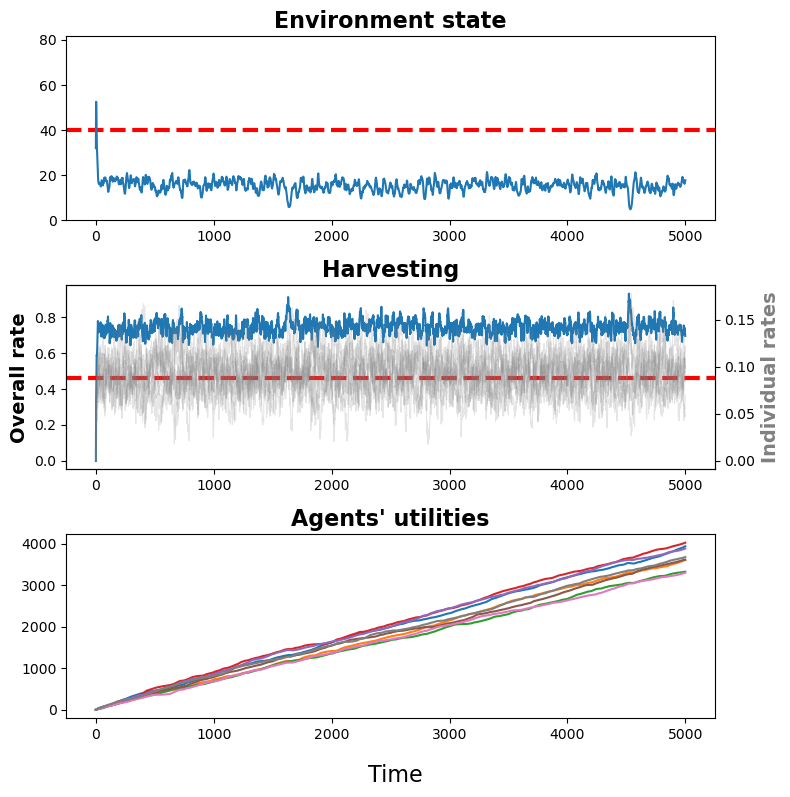

In [3]:
plotter = DynamicsPlotter(dynamics, sol)
fig, axes = plotter.subplots(nrows=3, figsize=(8, 8))

plotter.plot_state(axes[0])
plotter.plot_harvesting(axes[1])
plotter.plot_utilities(axes[2])
fig.tight_layout()